In [2]:
#PREPARATION
import sklearn
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [3]:
#DATA PREPARATION
#Load our dataset
df = pd.read_csv("cd.csv")
#Slice up the file to include dummy variables
xx = df[["CHK_ACCT", "HISTORY", "EMPLOYMENT", "PRESENT_RESIDENT", "SAV_ACCT", "JOB"]]
#Save the list of columns to a variables for ease of use
yy = xx.columns.tolist()
#Convert int64 type of our variables to category variables for dummy change to work
xx[yy] = xx.astype('category')
#Create the dummy variables in new dataframe
xx = pd.get_dummies(data=xx, drop_first=True)
#Create a slice of remaining columns
df3 = df[["DURATION", "RETRAINING", "AMOUNT", "INSTALL_RATE", "MALE_SINGLE", "REAL_ESTATE", "AGE", "OTHER_INSTALL", "OWN_RES", "NUM_CREDITS", "NUM_DEPENDENTS", "TELEPHONE", "DEFAULT"]]
#Save and re-read the file to get around uint64 blocking us from concat the two dataframes
xx.to_csv("dummies.csv")
#Re-read as df2
df2 = pd.read_csv("dummies.csv")
#Concat two dataframes
df = pd.concat([df3, df2], axis=1)


C:\Users\wurrz\anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [4]:
#MODEL CREATATION 1 - Logistic Regression
#Set up the data, getting rid of dependant variable from data set, and index number
X = df.drop(["Unnamed: 0","DEFAULT"], axis=1)
y = df["DEFAULT"]

# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)




C:\Users\wurrz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   DURATION            1000 non-null   int64
 1   RETRAINING          1000 non-null   int64
 2   AMOUNT              1000 non-null   int64
 3   INSTALL_RATE        1000 non-null   int64
 4   MALE_SINGLE         1000 non-null   int64
 5   REAL_ESTATE         1000 non-null   int64
 6   AGE                 1000 non-null   int64
 7   OTHER_INSTALL       1000 non-null   int64
 8   OWN_RES             1000 non-null   int64
 9   NUM_CREDITS         1000 non-null   int64
 10  NUM_DEPENDENTS      1000 non-null   int64
 11  TELEPHONE           1000 non-null   int64
 12  DEFAULT             1000 non-null   int64
 13  Unnamed: 0          1000 non-null   int64
 14  CHK_ACCT_1          1000 non-null   int64
 15  CHK_ACCT_2          1000 non-null   int64
 16  CHK_ACCT_3          1000 non-null   int64
 

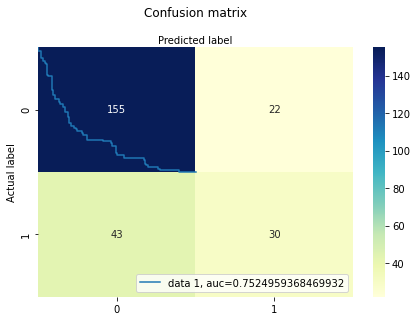

0.74
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       177
           1       0.58      0.41      0.48        73

    accuracy                           0.74       250
   macro avg       0.68      0.64      0.65       250
weighted avg       0.72      0.74      0.73       250



In [5]:
#RESULTS 1
# import the metrics class and required modules
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Confusion matrix 
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

# name  of classes
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#Testing metrics
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#Accuracy metric
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [8]:
#Confusion matrix 
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[155,  22],
       [ 43,  30]], dtype=int64)

Text(0.5, 15.0, 'Predicted label')

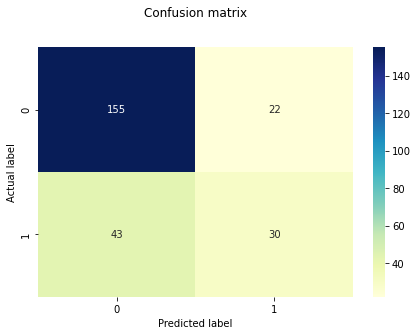

In [9]:
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

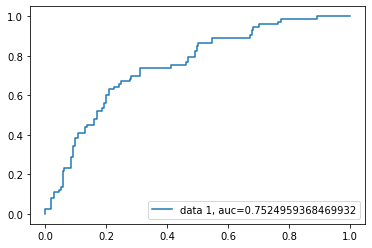

In [105]:
#RESULTS 2
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

 The importance of feature 'DURATION' is 9.68%.
 The importance of feature 'RETRAINING' is 1.47%.
 The importance of feature 'AMOUNT' is 16.29%.
 The importance of feature 'INSTALL_RATE' is 4.59%.
 The importance of feature 'MALE_SINGLE' is 2.45%.
 The importance of feature 'REAL_ESTATE' is 2.11%.
 The importance of feature 'AGE' is 11.42%.
 The importance of feature 'OTHER_INSTALL' is 2.21%.
 The importance of feature 'OWN_RES' is 2.93%.
 The importance of feature 'NUM_CREDITS' is 2.58%.
 The importance of feature 'NUM_DEPENDENTS' is 1.49%.
 The importance of feature 'TELEPHONE' is 2.23%.
 The importance of feature 'CHK_ACCT_1' is 2.41%.
 The importance of feature 'CHK_ACCT_2' is 1.13%.
 The importance of feature 'CHK_ACCT_3' is 6.16%.
 The importance of feature 'HISTORY_1' is 1.59%.
 The importance of feature 'HISTORY_2' is 1.87%.
 The importance of feature 'HISTORY_3' is 1.18%.
 The importance of feature 'HISTORY_4' is 2.45%.
 The importance of feature 'EMPLOYMENT_1' is 1.84%.
 The 

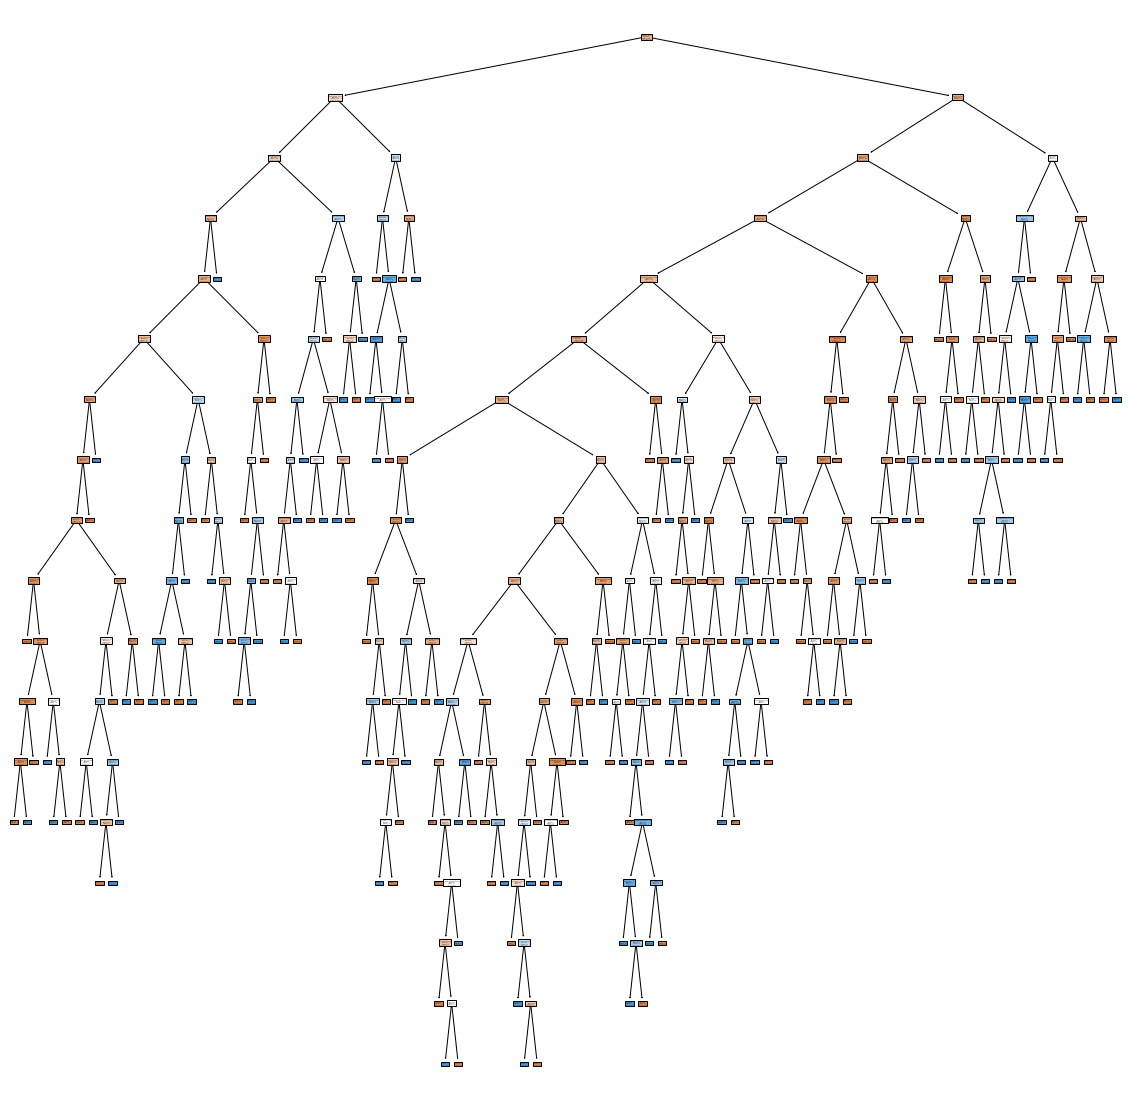

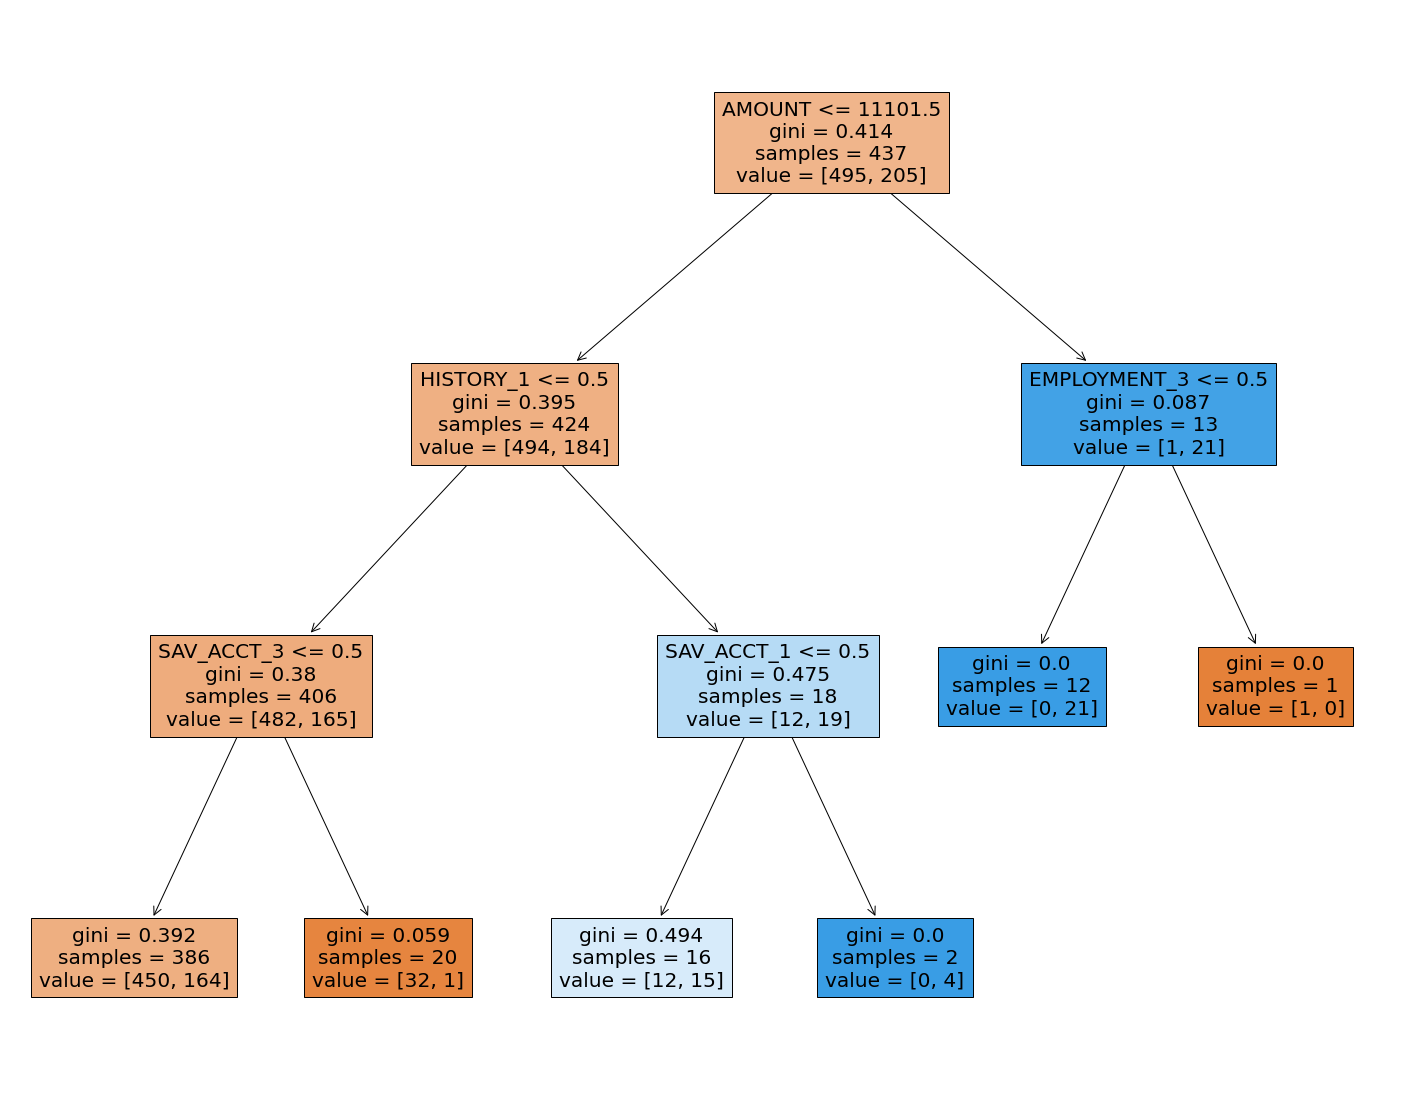

In [98]:
#MODEL CREATION 2 - Random forest - TEST MODEL
#Import necessary modules
import sklearn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from dtreeviz.trees import dtreeviz # will be used for tree visualization
from matplotlib import pyplot as plt


#Split and train our data, set a random seed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

rf_model = RandomForestClassifier(n_estimators=50)
rf_model.fit(X_train, y_train)

predictions = rf_model.predict(X_test)
predictions

rf_model.predict_proba(X_test)
rf_model.classes_

#Breakdown of importance metrics
importances = rf_model.feature_importances_
columns = X.columns
i = 0
while i < len(columns):
    print(f" The importance of feature '{columns[i]}' is {round(importances[i] * 100, 2)}%.")
    i += 1
#Results from first run
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))


#Plot a tree #1 no max depth
plt.figure(figsize=(20,20))
_ = tree.plot_tree(rf_model.estimators_[0], feature_names=X.columns, filled=True)

#Create a tree with max depth of 3
rf_model.estimators_[0].tree_.max_depth
rf_model2 = RandomForestClassifier(n_estimators=100, max_depth=3)

#Train new model for tree#2
rf_model2.fit(X_train, y_train)

#Breakdown of importance metrics
predictions1 = rf_model2.predict(X_test)
predictions1

rf_model2.predict_proba(X_test)
rf_model2.classes_

importances1 = rf_model2.feature_importances_
columns1 = X.columns
i = 0

while i < len(columns1):
    print(f" The importance of feature '{columns1[i]}' is {round(importances1[i] * 100, 2)}%.")
    i += 1
    
#Result for tree #2
print(accuracy_score(y_test, predictions1))
print(confusion_matrix(y_test, predictions1))
print(classification_report(y_test, predictions1))
#Plot tree #2
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(rf_model2.estimators_[0], feature_names=X.columns, filled=True)

In [99]:
predictions

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], d